### Exercise 7

| Feature             | Type       | Description                                       |
|---------------------|------------|---------------------------------------------------|
| num-of-cylinders    | Integer    | Number of cylinders in the engine.                |
| engine-type         | Categorical| Type of engine.                                  |
| curb-weight         | Continuous | Curb weight of the vehicle.                      |
| height              | Continuous | Height of the vehicle.                           |
| width               | Continuous | Width of the vehicle.                            |
| length              | Continuous | Length of the vehicle.                           |
| wheel-base          | Continuous | Wheelbase of the vehicle.                        |
| engine-location     | Binary     | Location of the engine in the vehicle.          |
| drive-wheels        | Categorical| Wheel drive type of the vehicle.                 |
| body-style          | Categorical| Body style of the vehicle.                       |
| price               | Continuous | Price of the vehicle.                            |
| highway-mpg         | Continuous | Highway miles per gallon (MPG) of the vehicle.  |
| city-mpg            | Continuous | City miles per gallon (MPG) of the vehicle.     |
| peak-rpm            | Continuous | Peak RPM of the engine.                          |
| horsepower         | Continuous | Horsepower of the engine.                        |
| compression-ratio  | Continuous | Compression ratio of the engine.                 |
| stroke              | Continuous | Stroke length of the engine.                    |
| bore                | Continuous | Bore size of the engine.                        |
| fuel-system         | Categorical| Type of fuel system.                            |
| engine-size         | Continuous | Size of the engine.                             |
| num-of-doors        | Integer    | Number of doors in the vehicle.                 |
| aspiration          | Binary     | Whether the engine is turbocharged or not.     |
| fuel-type           | Binary     | Fuel type of the vehicle.                       |
| make                | Categorical| Make (brand) of the vehicle.                    |
| normalized-losses  | Continuous | Normalized losses of the vehicle.               |
| symboling           | Integer    | Symbolic value for the vehicle.                 |


In [240]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

In [242]:
# fetch dataset
automobile = fetch_ucirepo(id=10)

In [243]:
# Veri setini pandas DataFrame olarak alma
x = automobile.data.features
y = automobile.data.targets

In [244]:
y.head()

,symboling
0,3
1,3
2,1
3,2
4,2


In [245]:
x = pd.DataFrame(x)
x.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [246]:
x.shape

(205, 25)

In [247]:
y.value_counts()

symboling
 0           67
 1           54
 2           32
 3           27
-1           22
-2            3
dtype: int64

## Preprocessing

In [248]:
x.isna().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [249]:
# only names of columns with null values
x.columns[x.isnull().any()]

Index(['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'num-of-doors',
       'normalized-losses'],
      dtype='object')

In [250]:
x["num-of-doors"].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

In [251]:
# Null values in each feature column of the data frame have been filled with their respective mean values.
# This block for continuous data
numeric_columns = ['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'normalized-losses']

for column in numeric_columns:
    if x[column].isnull().any():
        x.loc[x[column].isnull(), column] = x[column].mean()

In [252]:
# this block for integer categorical data
# Fill null values in the 'num-of-doors' column with the most frequent value (mode)
x.loc[x['num-of-doors'].isnull(), 'num-of-doors'] = x['num-of-doors'].mode()[0]

In [253]:
# control
x.columns[x.isnull().any()]

Index([], dtype='object')

In [254]:
non_numeric_columns = x.select_dtypes(exclude=np.number).columns
print("Non numeric columns : ", non_numeric_columns)

Non numeric columns :  Index(['fuel-system', 'engine-type', 'engine-location', 'drive-wheels',
       'body-style', 'aspiration', 'fuel-type', 'make'],
      dtype='object')


In [255]:
# Label Encoding
label_encoder = LabelEncoder()

for column in non_numeric_columns:
    x.loc[:,column] = label_encoder.fit_transform(x[column])

C:\Users\Excalibur\AppData\Local\Temp\ipykernel_31324\1943040179.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,column] = label_encoder.fit_transform(x[column])
C:\Users\Excalibur\AppData\Local\Temp\ipykernel_31324\1943040179.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,column] = label_encoder.fit_transform(x[column])
C:\Users\Excalibur\AppData\Local\Temp\ipykernel_31324\1943040179.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always set

In [256]:
x.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,122.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,122.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,5,152,...,171.2,94.5,0,2,2,2.0,0,1,0,122.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,5,109,...,176.6,99.8,0,1,3,4.0,0,1,1,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,5,136,...,176.6,99.4,0,0,3,4.0,0,1,1,164.0


## Data Visualization

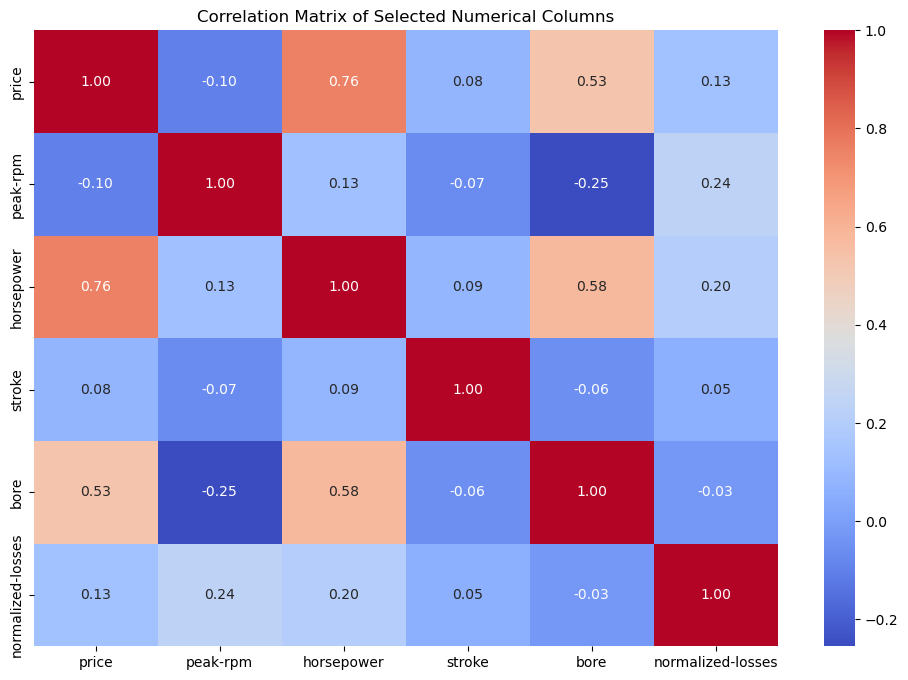

In [257]:
plt.figure(figsize=(12, 8))
sns.heatmap(x[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Numerical Columns')
plt.show()

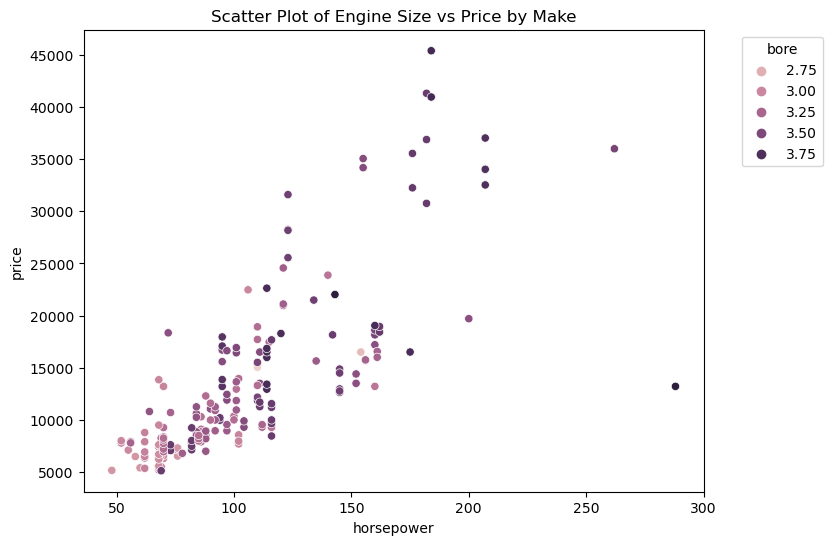

In [258]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='horsepower', y='price', hue='bore', data=x)
plt.title('Scatter Plot of Engine Size vs Price by Make')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title= "bore")
plt.show()

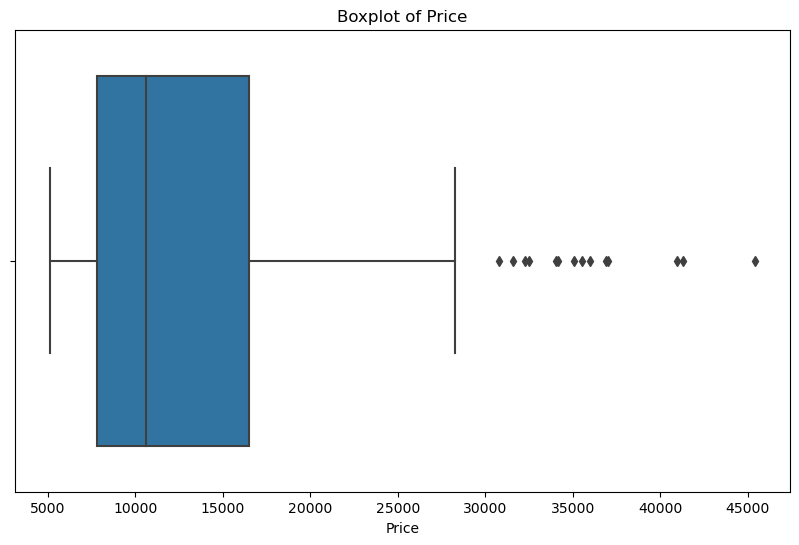

In [259]:
plt.figure(figsize=(10, 6))

# Price 
sns.boxplot(x=x['price'])

# title and labels
plt.title('Boxplot of Price')
plt.xlabel('Price')

plt.show()

## Normalize 

In [260]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

## Classification

In [261]:
# Separating the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating the k-NN model (k=3)
k=4
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_model.fit(X_train, y_train)

c:\Users\Excalibur\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [262]:
# Make predictions using the test set
y_pred = knn_model.predict(X_test)

# Evaluate the accuracy of the model
train_accuracy = accuracy_score(y_train, knn_model.predict(X_train))
print(f"Train set accuracy:{train_accuracy:.2f}", )

# evaluate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy:{test_accuracy:.2f}", )



Train set accuracy:0.79
Test set accuracy:0.66


## Evaluation

### Jaccard Index

Jaccard Index is a metric used to measure the similarity between two sets.

Jaccard_Index= ∣A∩B∣ / ∣A∪B∣

In [264]:
# evaluation Jaccard İndeksi
jaccard_index = jaccard_score(y_test, y_pred, average='micro')

print(f"Jaccard Index: {jaccard_index:.2f}")

Jaccard Index: 0.49


## Log Loss

Log Loss (Logarithmic Loss) or Cross-Entropy Loss is a metric that measures how well a classification model's predictions align with the actual labels.

In [269]:
y_pred=pd.DataFrame(y_pred)
y_pred.value_counts()

 0    20
 1     9
-1     4
 2     4
 3     4
dtype: int64

In [270]:
y_pred_proba = knn_model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)

print(f"Log Loss: {logloss:.3f}")

Log Loss: 4.040


## F1-Score 

In [272]:
# evaluation F1-score
f1score = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Score:{f1score:.2f}", )

F1 Score:0.64
